## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['CustomerID'], axis=1, inplace=True)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

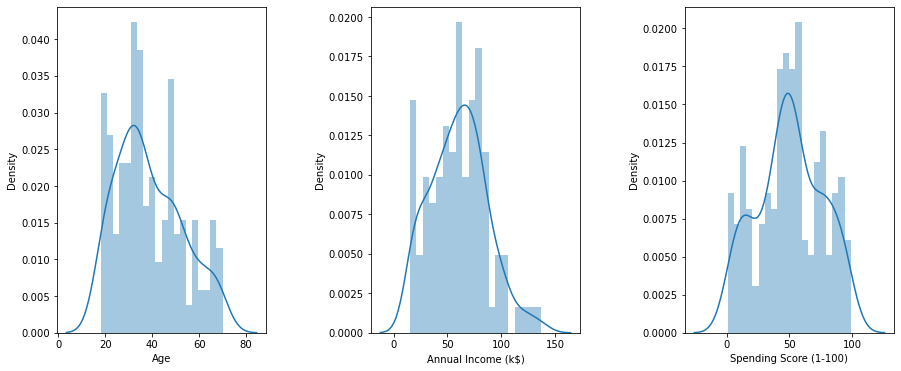

In [7]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)' ,'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    
plt.show()

<AxesSubplot:xlabel='count', ylabel='Gender'>

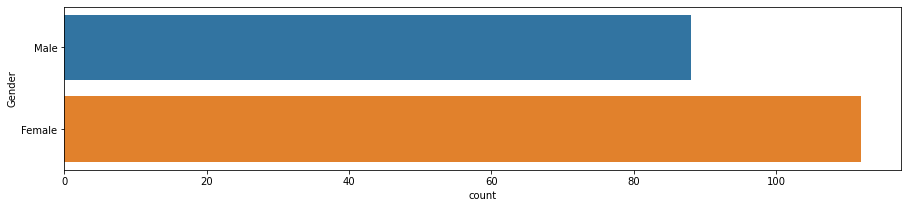

In [8]:
plt.figure(figsize=(15,3))
sns.countplot(y='Gender', data=data)

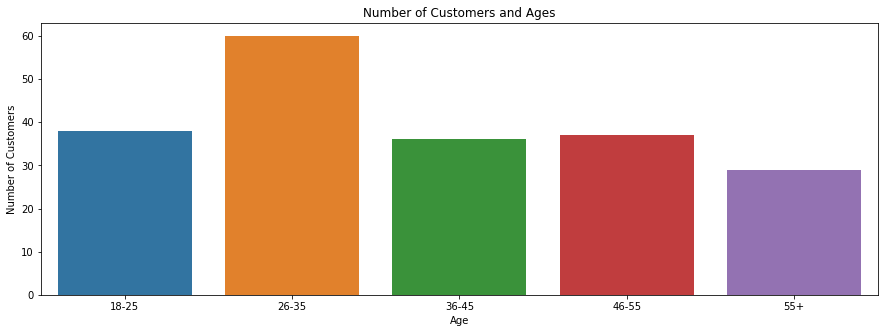

In [9]:
age_18_25 = data.Age[(data.Age >=18) & (data.Age <=25)]
age_26_35 = data.Age[(data.Age >=26) & (data.Age <=35)]
age_36_45 = data.Age[(data.Age >=36) & (data.Age <=45)]
age_46_55 = data.Age[(data.Age >=46) & (data.Age <=55)]
age_55 = data.Age[(data.Age >=56)]

ageX = ["18-25", "26-35", "36-45", "46-55", "55+"]
ageY = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55)]

plt.figure(figsize=(15,5))
sns.barplot(x=ageX, y=ageY)
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


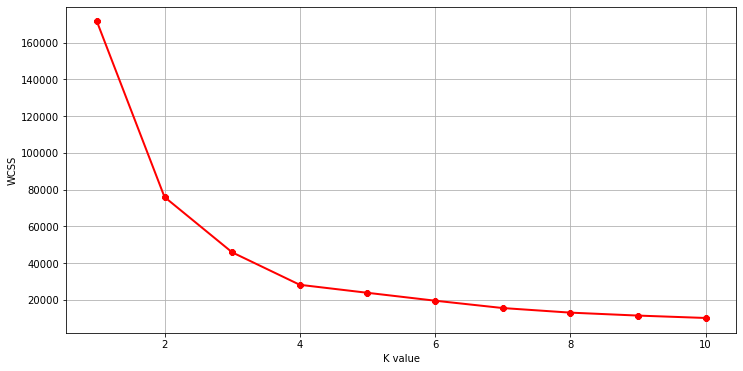

In [10]:
x1 = data.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [12]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


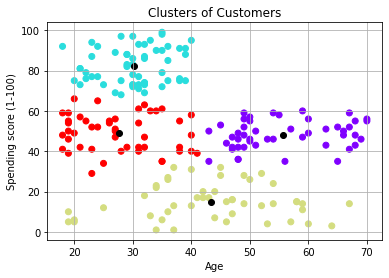

In [13]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel('Age')
plt.ylabel('Spending score (1-100)')
plt.grid()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


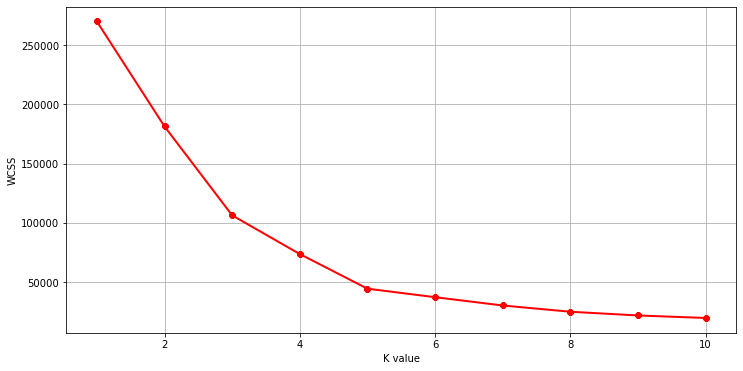

In [14]:
x2 = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
print(label)
#print(kmeans.cluster_centers_)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


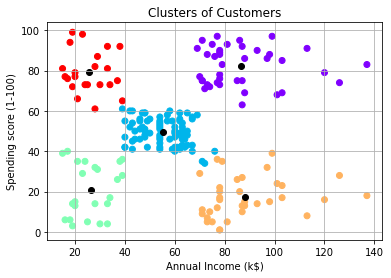

In [16]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.grid()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


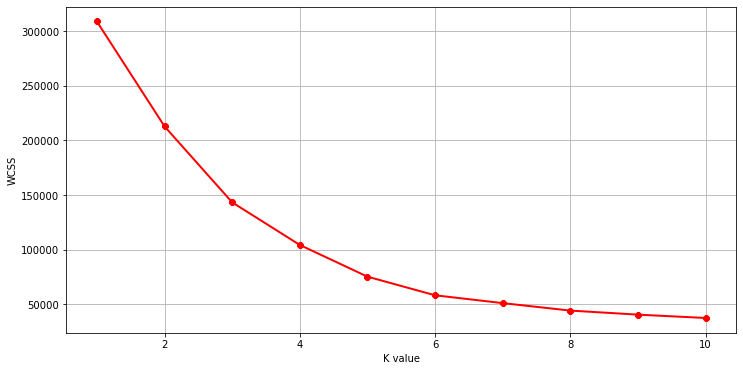

In [17]:
x3 = data.iloc[:, 1:]

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [19]:
print(kmeans.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]]


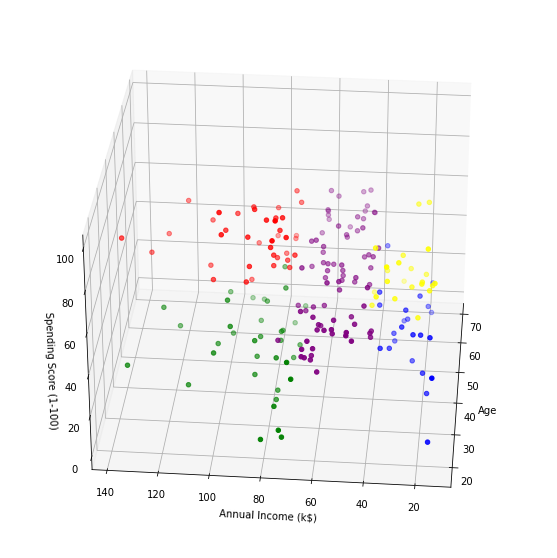

In [21]:
clusters = kmeans.fit_predict(x3)
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label==0], data["Annual Income (k$)"][data.label==0], data["Spending Score (1-100)"][data.label==0], c='blue')
ax.scatter(data.Age[data.label==1], data["Annual Income (k$)"][data.label==1], data["Spending Score (1-100)"][data.label==1], c='red')
ax.scatter(data.Age[data.label==2], data["Annual Income (k$)"][data.label==2], data["Spending Score (1-100)"][data.label==2], c='green')
ax.scatter(data.Age[data.label==3], data["Annual Income (k$)"][data.label==3], data["Spending Score (1-100)"][data.label==3], c='yellow')
ax.scatter(data.Age[data.label==4], data["Annual Income (k$)"][data.label==4], data["Spending Score (1-100)"][data.label==4], c='purple')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

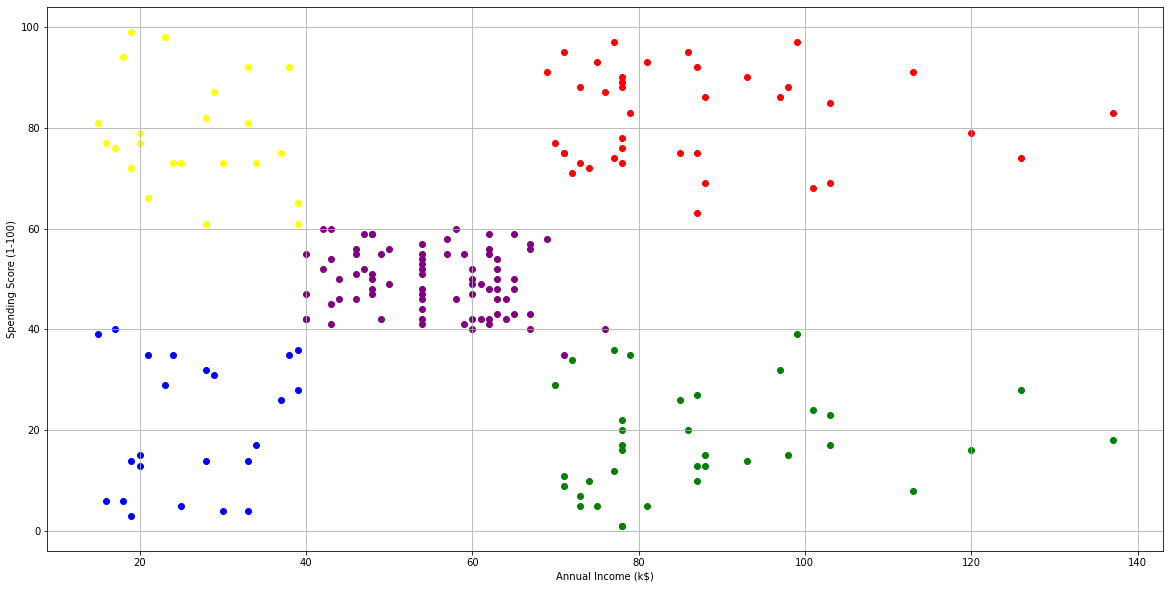

In [22]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(data["Annual Income (k$)"][data.label==0], data["Spending Score (1-100)"][data.label==0], c='blue')
ax.scatter(data["Annual Income (k$)"][data.label==1], data["Spending Score (1-100)"][data.label==1], c='red')
ax.scatter(data["Annual Income (k$)"][data.label==2], data["Spending Score (1-100)"][data.label==2], c='green')
ax.scatter(data["Annual Income (k$)"][data.label==3], data["Spending Score (1-100)"][data.label==3], c='yellow')
ax.scatter(data["Annual Income (k$)"][data.label==4], data["Spending Score (1-100)"][data.label==4], c='purple')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

As shown in the scatterplot,

Cluster 1(color="Blue") : This cluster denotes the customer_data with low annual income as well as low yearly spend of
                          income.

Cluster 2(color="yellow") :  This cluster represents a low annual income but its high yearly expenditure.

Cluster 3(color="purple") : These clusters represent the customer_data with the medium income salary as well as the medium 
                            annual spend of salary.
                            
Cluster 4(color="green") : This cluster represents a high annual income but its low yearly spend of income.

Cluster 5(color="red") : This cluster represents high Annual income as well as high Spending score.